# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Membaca dataset
df = pd.read_csv('emails.csv', encoding='latin1')

# Melihat 5 baris pertama untuk memahami struktur data
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print(f"Jumlah baris dan kolom: {df.shape}")
df.info()

Jumlah baris dan kolom: (1386, 3002)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(638), int64(2363), object(1)
memory usage: 31.7+ MB


Prediction
0.0    999
1.0    386
Name: count, dtype: int64


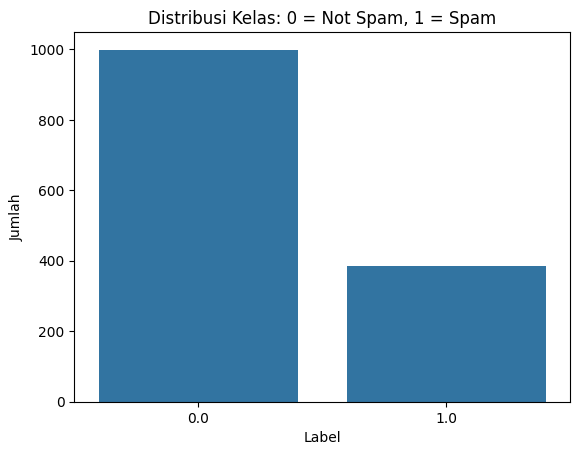

In [5]:
print(df['Prediction'].value_counts())
sns.countplot(x='Prediction', data=df)
plt.title('Distribusi Kelas: 0 = Not Spam, 1 = Spam')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

In [6]:
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
the,1386.0,6.953824,12.147203,0.0,1.0,3.0,8.00,210.0
to,1386.0,6.486291,9.816300,0.0,1.0,3.0,8.00,132.0
ect,1386.0,6.469697,17.687403,1.0,1.0,2.0,5.00,344.0
and,1386.0,3.106782,6.095166,0.0,0.0,1.0,3.00,83.0
for,1386.0,3.380231,4.925629,0.0,1.0,2.0,4.00,39.0
of,1386.0,2.577201,5.778726,0.0,0.0,1.0,2.00,77.0
a,1386.0,59.860750,98.275830,0.0,14.0,30.0,64.75,1898.0
you,1386.0,2.647186,4.511075,0.0,0.0,1.0,3.00,42.0
hou,1386.0,2.578644,8.696982,0.0,0.0,0.0,2.00,167.0
in,1386.0,11.030303,18.648617,0.0,2.0,5.0,12.00,223.0


In [7]:
print("Missing value per kolom:\n", df.isnull().sum().sort_values(ascending=False).head())
print("Total duplikasi data:", df.duplicated().sum())

Missing value per kolom:
 diane       1
bussell     1
hair        1
tessie      1
dewpoint    1
dtype: int64
Total duplikasi data: 0


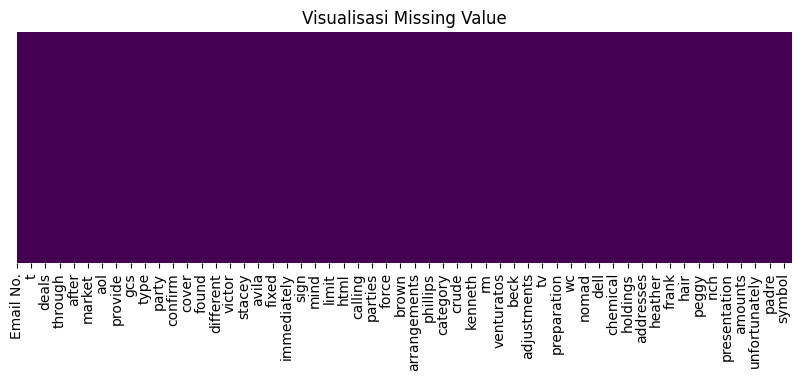

In [8]:
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Value')
plt.show()

In [9]:
print("Distribusi label:")
print(df['Prediction'].value_counts(dropna=False))

Distribusi label:
Prediction
0.0    999
1.0    386
NaN      1
Name: count, dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
print("Jumlah missing value per kolom:")
print(df.isnull().sum())
# Tidak ditemukan missing value pada dataset, sehingga tidak perlu penanganan lebih lanjut.

Jumlah missing value per kolom:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64


In [11]:
print("Duplikat data:", df.duplicated().sum())
# Tidak ditemukan data duplikat pada dataset.

Duplikat data: 0


In [12]:
# Normalisasi/Standarisasi Fitur
# Tidak dilakukan normalisasi/standarisasi karena fitur sudah dalam bentuk numerik hasil TF-IDF,
# serta model yang digunakan tidak sensitif terhadap skala fitur.

In [13]:
# Deteksi dan Penanganan Outlier
# Tidak dilakukan deteksi outlier karena fitur merupakan hasil ekstraksi frekuensi kata.

In [14]:
# Encoding Data Kategorikal
# Tidak ada fitur kategorikal yang perlu di-encode pada dataset ini.

In [15]:
# Binning (Pengelompokan Data)
# Tidak dilakukan binning pada tahap ini, karena semua fitur sudah dalam bentuk numerik yang sesuai.

In [16]:
# Pada tahap preprocessing ini, dilakukan pemeriksaan terhadap data kosong (missing values) dan data duplikat, namun tidak ditemukan adanya data kosong maupun duplikat pada dataset.
# Semua fitur sudah berupa data numerik hasil ekstraksi teks (TF-IDF), sehingga tidak diperlukan encoding, normalisasi, ataupun deteksi outlier lebih lanjut.

In [17]:
# Simpan hasil preprocessing ke file CSV
df.to_csv('hasil_preprocessing.csv', index=False)
print("Hasil preprocessing berhasil disimpan ke file 'hasil_preprocessing.csv'")

Hasil preprocessing berhasil disimpan ke file 'hasil_preprocessing.csv'
